In [32]:
using NBInclude
@nbinclude("../../Many-Body/Chern_parameter_space_sum.ipynb")
@nbinclude("../Hofstadter/Hofstadter Single Particle in Julia.ipynb")

Hofstadter_SP (generic function with 1 method)

In [35]:
Nx = 5
Ny = 5
N = Nx*Ny
p = 2
q = 5
t = 1
PN = 2;

In [36]:
using QuantumOptics

In [37]:
N1 = 20
N2 = 20
dx=2*pi/N1
dy=dx
Tx=collect(range(start=0, stop=2*pi-dx, step=dx))
Ty=collect(range(start=0, stop=2*pi-dy, step=dy));

In [50]:
function KM_Hamiltonian(Nx, Ny, N, t, p, q, Tx, Ty)

    alpha = p/q
    
    H = zeros(Complex{Float64}, Nx*Ny,Nx*Ny)
    
    for j in 1:N
        for k in 1:N
            if j!=k
                
                xy = square_lattice(Nx, Ny)[2]
                x_j = xy[j, 1] 
                y_j = xy[j, 2] 
                x_k = xy[k, 1]
                y_k = xy[k, 2]

                z_j = x_j + 1im*y_j
                z_k = x_k + 1im*y_k

                for n in range(-1,1)
                    for m in range(-1,1)

                        R = n * Nx + 1im * m * Ny
                        z = (z_k - z_j) + R 
                        G = (-1) .^ ( real(z) + imag(z) + real(z) .* imag(z) )

                        beta = (pi/2) * ( (z_j .* conj(z) ) - (conj(z_j) .* z) ) * alpha
                        W = t * G .* exp( -pi/2 * (1-alpha) * (abs(z).^2) )
                        J = W .* exp(beta) * exp( pi/2 * ( (z_j * conj(R) ) - (conj(z_j) * R) ) * alpha)
                        T = exp( 1im * ( real(R) / Nx ) * Tx + 1im * ( imag(R) / Ny ) * Ty)

                        H[j,k] += J*T

                    end
                end
                
            end
        end
    end

    return H
end

KM_Hamiltonian (generic function with 2 methods)

In [51]:
function Op_Sp(Nx, Ny, N, t, p, q, Tx, Ty)

    H_T = KM_Hamiltonian(Nx, Ny, N, t, p, q, Tx, Ty)

    basis = NLevelBasis(N) 
    
    H = SparseOperator(basis)
    
    for m in 1:N
        for n in 1:N
            H = H + H_T[m,n] * transition(basis, m, n)
        end
    end
    
    return H
end

Op_Sp (generic function with 1 method)

In [52]:
function KM_Mb(Op, PN)
    
    basis = NLevelBasis(N)
    states = bosonstates(basis, PN)
    basis_mb = ManyBodyBasis(basis, states)

    H = SparseOperator(basis_mb) 
    
    for m in 1:N
        for n in 1:N
            H += Op.data[m,n] * transition(basis_mb, m, n)
        end
    end
    
    return H
    
end

KM_Mb (generic function with 1 method)

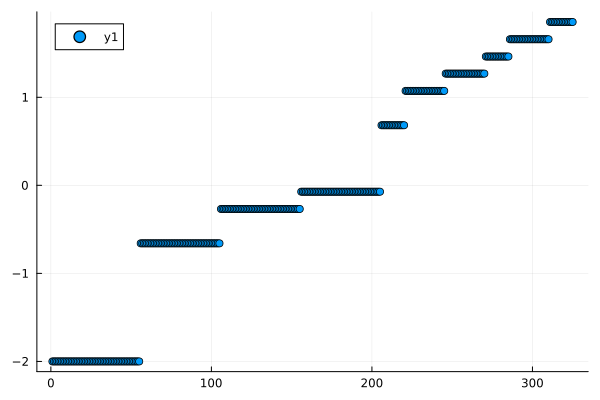

In [53]:
using Plots
dimH = 325
EEA, UUA = calc_states_KM_mb(Nx, Ny, N, PN, N1, N2, p, q, Tx, Ty, dimH)
scatter(real(EEA[1,1,:]))

In [44]:
EEA[1,1,1:56]

56-element Vector{ComplexF64}:
  -1.999999999532001 - 2.0079424234431542e-16im
 -1.9999999995319981 + 6.440160904563896e-17im
  -1.999999999531997 + 8.205843434762848e-17im
  -1.999999999531996 - 7.892991815694472e-17im
 -1.9999999995319941 - 9.589226114548044e-16im
 -1.9999999995319941 - 5.269222558279552e-16im
  -1.999999999531992 - 3.720981855970251e-16im
 -1.9999999995319917 + 1.0747899308028916e-16im
 -1.9999999995319913 + 1.6182147003795966e-16im
  -1.999999999531991 - 1.0495077029659683e-16im
   -1.99999999953199 - 5.564103804859517e-17im
   -1.99999999953199 + 1.207801220148852e-16im
 -1.9999999995319893 - 2.6291902682773483e-16im
                     ⋮
 -1.9999999995319782 - 1.6306400674181987e-16im
  -1.999999999531978 - 1.9433272395961426e-17im
 -1.9999999995319775 - 3.469446951953614e-17im
 -1.9999999995319775 + 4.683753385137379e-17im
 -1.9999999995319768 - 2.48380553321062e-16im
 -1.9999999995319766 - 9.020562075079397e-17im
 -1.9999999995319764 + 3.0878077872387166e-16im

In [45]:
UU = calc_link_vars(UUA[:,:,:,1:55])
F12 = calc_F12(UU)
println(sum(F12)/(2im*pi))

11.0 + 3.5035797662996674e-16im
